##This notebook is for visualizing the effects of data augmentation.

In [ ]:
#https://www.tensorflow.org/tutorials/images/data_augmentation
#https://www.tensorflow.org/tutorials/images/classification

In [ ]:
 #mount google drive with images
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#install and load important dependencies
!pip install -q pyyaml h5py

import datetime, os, cv2
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

from sklearn.metrics import classification_report, confusion_matrix

from google.colab.patches import cv2_imshow

%tensorflow_version 2.x
print('TensorFlow version is {}'.format(tf.__version__))

In [4]:
#add data locations - this is class balanced data
#training has ~500 images, test and val have ~100 each
train_dir = '/content/drive/My Drive/machine_learning_projects/support_classification/eight_supports_balanced/train'
validation_dir = '/content/drive/My Drive/machine_learning_projects/support_classification/eight_supports_balanced/validation'
test_dir = '/content/drive/My Drive/machine_learning_projects/support_classification/eight_supports_balanced/test'
joke_dir = '/content/drive/My Drive/machine_learning_projects/support_classification/eight_supports_balanced/joke'

train_Al2O3_dir = os.path.join(train_dir, 'Al2O3')
train_CeO2_dir = os.path.join(train_dir, 'CeO2')
train_MgO_dir = os.path.join(train_dir, 'MgO')
train_NPs_dir = os.path.join(train_dir, 'NPs')
train_POF_dir = os.path.join(train_dir, 'POF')
train_SiO2a_dir = os.path.join(train_dir, 'SiO2a')
train_SiO2NBs_dir = os.path.join(train_dir, 'SiO2NBs')
train_TiO2_dir = os.path.join(train_dir, 'TiO2')

validation_Al2O3_dir = os.path.join(validation_dir, 'Al2O3')
validation_CeO2_dir = os.path.join(validation_dir, 'CeO2')
validation_MgO_dir = os.path.join(validation_dir, 'MgO')
validation_NPs_dir = os.path.join(validation_dir, 'NPs')
validation_POF_dir = os.path.join(validation_dir, 'POF')
validation_SiO2a_dir = os.path.join(validation_dir, 'SiO2a')
validation_SiO2NBs_dir = os.path.join(validation_dir, 'SiO2NBs')
validation_TiO2_dir = os.path.join(validation_dir, 'TiO2')

test_Al2O3_dir = os.path.join(test_dir, 'Al2O3')
test_CeO2_dir = os.path.join(test_dir, 'CeO2')
test_MgO_dir = os.path.join(test_dir, 'MgO')
test_NPs_dir = os.path.join(test_dir, 'NPs')
test_POF_dir = os.path.join(test_dir, 'POF')
test_SiO2a_dir = os.path.join(test_dir, 'SiO2a')
test_SiO2NBs_dir = os.path.join(test_dir, 'SiO2NBs')
test_TiO2_dir = os.path.join(test_dir, 'TiO2')

num_Al2O3_tr = len(os.listdir(train_NPs_dir))
num_CeO2_tr = len(os.listdir(train_SiO2NBs_dir))
num_MgO_tr = len(os.listdir(train_TiO2_dir))
num_NPs_tr = len(os.listdir(train_NPs_dir))
num_POF_tr = len(os.listdir(train_SiO2NBs_dir))
num_SiO2a_tr = len(os.listdir(train_TiO2_dir))
num_SiO2NBs_tr = len(os.listdir(train_TiO2_dir))
num_TiO2_tr = len(os.listdir(train_TiO2_dir))

num_Al2O3_val = len(os.listdir(validation_NPs_dir))
num_CeO2_val = len(os.listdir(validation_SiO2NBs_dir))
num_MgO_val = len(os.listdir(validation_TiO2_dir))
num_NPs_val = len(os.listdir(validation_NPs_dir))
num_POF_val = len(os.listdir(validation_SiO2NBs_dir))
num_SiO2a_val = len(os.listdir(validation_TiO2_dir))
num_SiO2NBs_val = len(os.listdir(validation_TiO2_dir))
num_TiO2_val = len(os.listdir(validation_TiO2_dir))

num_Al2O3_test = len(os.listdir(test_NPs_dir))
num_CeO2_test = len(os.listdir(test_SiO2NBs_dir))
num_MgO_test = len(os.listdir(test_TiO2_dir))
num_NPs_test = len(os.listdir(test_NPs_dir))
num_POF_test = len(os.listdir(test_SiO2NBs_dir))
num_SiO2a_test = len(os.listdir(test_TiO2_dir))
num_SiO2NBs_test = len(os.listdir(test_TiO2_dir))
num_TiO2_test = len(os.listdir(test_TiO2_dir))

joke_TiO2_dir = os.path.join(joke_dir, 'TiO2')
num_TiO2_joke = len(os.listdir(joke_TiO2_dir))

total_train = num_Al2O3_tr + num_CeO2_tr + num_MgO_tr + num_NPs_tr + num_POF_tr + num_SiO2a_tr + num_SiO2NBs_tr + num_TiO2_tr
total_val = num_Al2O3_val + num_CeO2_val + num_MgO_val + num_NPs_val + num_POF_val + num_SiO2a_val + num_SiO2NBs_val + num_TiO2_val
total_test = num_Al2O3_test + num_CeO2_test + num_MgO_test + num_NPs_test + num_POF_test + num_SiO2a_test + num_SiO2NBs_test + num_TiO2_test

print('The number of training examples is {}, validation examples is {}, and test examples is {}'.format(total_train, total_val, total_test))

The number of training examples is 4254, validation examples is 800, and test examples is 800


In [15]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Found 1 images belonging to 2 classes.


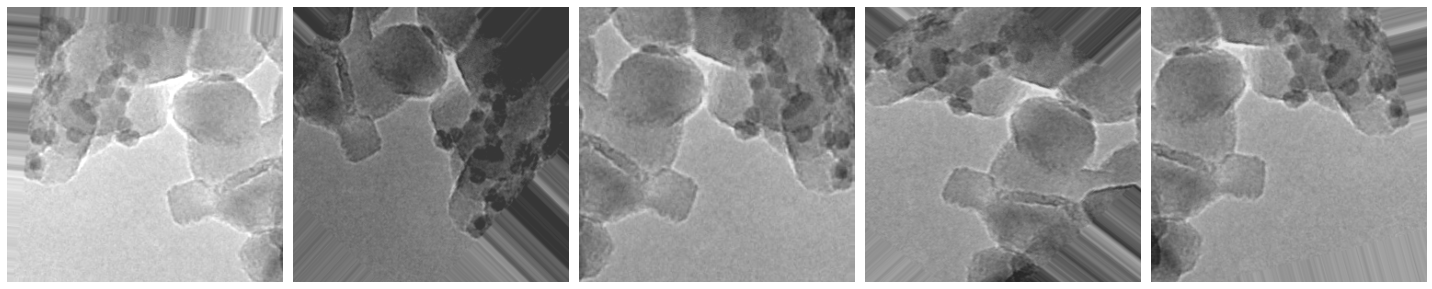

In [16]:
batch_size = 5
IMG_HEIGHT = 300
IMG_WIDTH = 300

joke_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range = .1,
                    height_shift_range = .1,
                    horizontal_flip=True,
                    zoom_range = .1,
                    channel_shift_range=75
                    )

val_data_gen = joke_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=joke_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical',
                                                              shuffle = True)

augmented_images = [val_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)